In [ ]:
!pip install -q -U google-generativeai

In [ ]:
!pip install google-cloud-vision
!pip install openai==0.28


In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/qyyim-436618-1805f9b72f40.json"

In [ ]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import display, Markdown
from google.colab import userdata

GOOGLE_API=userdata.get('GOOGLE_API')
genai.configure(api_key=GOOGLE_API)

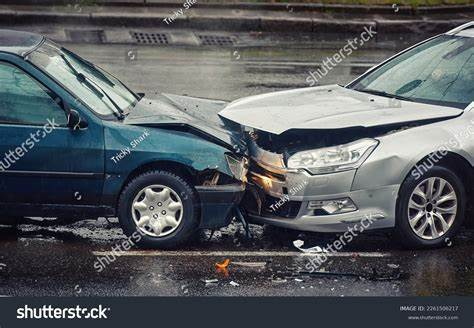

In [ ]:
import PIL.Image

img = PIL.Image.open("/content/AccidentTestFront.jpeg")
img

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
prompt_arabic = """
أنت شرطي مرور.
سيتم تزويدك بصور لحوادث المرور و ستقوم بوصف الحادث وتحديد مكان الصدمه فقط.
"""


response = model.generate_content([prompt_arabic, img])
print(response.text)

وقع حادث اصطدام بين سيارتين متقابلتين،  موقع الصدمة في مقدمة السيارتين.



In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
prompt_arabic = """
انت شرطي مرور , سيتم تزويدك بصورة حادث مروري وستقوم بوصف الحادث بناء على الصوره وتحديد عدد الاطراف وتحديد مكان الصدمه والاضرار ان وجدت ولون كل سياره  فقط بدون ذكر تفاصيل اخرى
"""


response = model.generate_content([prompt_arabic, img])
print(response.text)

حدث تصادم بين سيارتين، الأولى زرقاء والثانية رمادية. 
وقع التصادم بين مقدمة السيارتين. 
يظهر ضرر واضح في مقدمة السيارتين. 



In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
prompt_arabic = """
انت شرطي مرور , سيتم تزويدك بصورة حادث مروري وستقوم بوصف الحادث بناء على الصوره وتحديد عدد الاطراف  والاضرار ان وجدت ولون كل سياره  فقط بدون ذكر تفاصيل اخرى
"""


response = model.generate_content([prompt_arabic, img])
print(response.text)

حادث مروري بين سيارتين. 

السيارة الاولى لونها اخضر غامق، والسيارة الثانية لونها رصاصي.  يظهر ضرر واضح في الجزء الأمامي من السيارتين. 



In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
prompt_arabic = """
انت محقق حوادث مروريه او شرطي مرور , سيتم تزيدك بصوره ان وجدت بها حادث قم بتحديد الطرف الايمن من الصوره بمسمى الطرف الاول و الطرف الايسر من الصوره بمسى الطرف الثاني
واريد منك وصف للحادث وتحديد الاضرار ان وجدت فقط
وان لم يكن هناك حادث في الصوره قم بكتابة لم يتم العثور على حادث في الصوره
"""


response = model.generate_content([prompt_arabic, img])
print(response.text)

الطرف الاول : السياره الزرقاء
الطرف الثاني : السياره الفضيه

وصف الحادث:  يبدو أن سيارة الطرف الأول اصطدمت بسياره الطرف الثاني من الامام  وذلك من خلال تهشم مقدمة السيارتين .
الاضرار :  تهشم  واضح في  مقدمة السيارتين . 



In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
prompt_arabic = """
انت محقق حوادث مروريه او شرطي مرور , سيتم تزيدك بصوره ان وجدت بها حادث قم بتحديد الطرف الايمن من الصوره بمسمى الطرف الاول و الطرف الايسر من الصوره بمسى الطرف الثاني
واريد منك وصف للحادث وتحديد الاضرار ان وجدت فقط
وان لم يكن هناك حادث في الصوره قم بكتابة لم يتم العثور على حادث في الصوره
"""


response = model.generate_content([prompt_arabic, img])
print(response.text)

الطرف الأول: السيارة الزرقاء على اليسار.
الطرف الثاني: السيارة الفضية على اليمين. 

**وصف الحادث:** 

يبدو أن الحادث وقع بين سيارتين في بيئة رطبة، ربما بسبب المطر.  تظهر الصوره تصادماً وجهاً لوجه بين مقدمة السيارتين . 

**الأضرار:**

* **الطرف الأول (السيارة الزرقاء):**  يظهر ضرر كبير في مقدمة السيارة الزرقاء، بما في ذلك غطاء المحرك،  المصابيح الأمامية و الرفرف الأمامي.
* **الطرف الثاني (السيارة الفضية):**  يظهر ضرر مماثل في مقدمة السيارة الفضية،  بما في ذلك غطاء المحرك،  المصابيح الأمامية و الرفرف الأمامي . 



In [ ]:
help(model.generate_content)

Help on method generate_content in module google.generativeai.generative_models:

generate_content(contents: 'content_types.ContentsType', *, generation_config: 'generation_types.GenerationConfigType | None' = None, safety_settings: 'safety_types.SafetySettingOptions | None' = None, stream: 'bool' = False, tools: 'content_types.FunctionLibraryType | None' = None, tool_config: 'content_types.ToolConfigType | None' = None, request_options: 'helper_types.RequestOptionsType | None' = None) -> 'generation_types.GenerateContentResponse' method of google.generativeai.generative_models.GenerativeModel instance
    A multipurpose function to generate responses from the model.
    
    This `GenerativeModel.generate_content` method can handle multimodal input, and multi-turn
    conversations.
    
    >>> model = genai.GenerativeModel('models/gemini-pro')
    >>> response = model.generate_content('Tell me a story about a magic backpack')
    >>> response.text
    
    ### Streaming
    
    Thi

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
prompt_arabic = """
انت محقق حوادث مروريه او شرطي مرور , سيتم تزيدك بصوره ان وجدت بها حادث قم بتحديد الطرف الايمن من الصوره بمسمى الطرف الاول و الطرف الايسر من الصوره بمسى الطرف الثاني
واريد منك وصف للحادث وتحديد الاضرار ان وجدت فقط
وان لم يكن هناك حادث في الصوره قم بكتابة لم يتم العثور على حادث في الصوره
"""


# response = model.generate_content([prompt_arabic, img],temperature=0.2)
response = model.generate_content([prompt_arabic, img], top_p=0.9, top_k=40)




print(response.text)

TypeError: GenerativeModel.generate_content() got an unexpected keyword argument 'top_p'

In [ ]:
!pip install google-generativeai

In [ ]:
generation_config = {
    'temperature': 0.7  # Adjust this based on your needs
}
response = model.generate_content([prompt_arabic, img], generation_config=generation_config)
print(response.text)


الطرف الأول: السيارة الزرقاء على اليسار
الطرف الثاني: السيارة الفضية على اليمين

**وصف الحادث:** 

يبدو أن الحادث وقع نتيجة اصطدام أمامي بين السيارتين. 

**الأضرار:**

* **الطرف الأول:**  يظهر ضرر كبير في مقدمة السيارة الزرقاء، بما في ذلك الكبوت،  المصد الأمامي،  والمصابيح الأمامية. 
* **الطرف الثاني:**  يظهر ضرر في مقدمة السيارة الفضية، ويشمل ذلك المصد الأمامي،  المصابيح الأمامية،  وغطاء المحرك. 



In [ ]:
generation_config = {
    'temperature': 0.3 # Adjust this based on your needs
}
response = model.generate_content([prompt_arabic, img], generation_config=generation_config)
print(response.text)

الطرف الأول: السيارة الزرقاء على اليسار.
الطرف الثاني: السيارة الفضية على اليمين.

وصف الحادث: 
يبدو أن الحادث وقع بين سيارتين في بيئة رطبة، ربما بسبب المطر.  اصطدمت مقدمة السيارة الزرقاء (الطرف الأول) بمقدمة السيارة الفضية (الطرف الثاني) مما أدى إلى أضرار جسيمة في كلا السيارتين.

الأضرار:
*  الطرف الأول:  تحطم غطاء المحرك الأمامي و المصد الأمامي و الكشافات الأمامية. 
*  الطرف الثاني: تحطم غطاء المحرك الأمامي و المصد الأمامي و الكشافات الأمامية. 



In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
prompt_arabic = """
انت محقق حوادث مروريه او شرطي مرور , سيتم تزيدك بصوره ان وجدت بها حادث قم بتحديد الطرف الاول على يسار الصوره  و الطرف الثاني على يمين الصوره
واريد منك وصف للحادث وتحديد الاضرار ان وجدت فقط
وان لم يكن هناك حادث في الصوره قم بكتابة لم يتم العثور على حادث في الصوره
"""
generation_config = {
    'temperature': 0.3 # Adjust this based on your needs
}
response = model.generate_content([prompt_arabic, img], generation_config=generation_config)
print(response.text)

يظهر في الصورة حادث تصادم بين سيارتين. 

* **الطرف الأول:** السيارة الزرقاء على يمين الصورة.
* **الطرف الثاني:** السيارة الفضية على يسار الصورة.

**وصف الحادث:** 

يبدو أن السيارة الزرقاء اصطدمت بالجانب الأيمن الأمامي للسيارة الفضية.  

**الأضرار:**

* **السيارة الزرقاء:**  يظهر ضرر كبير في مقدمة السيارة، بما في ذلك غطاء المحرك، والمصد الأمامي، والرفرف الأيمن.  
* **السيارة الفضية:**  يظهر ضرر في الجانب الأيمن الأمامي،  بما في ذلك المصد الأمامي،  والرفرف الأيمن،  والمصباح الأمامي الأيمن.



الطرف الأول (يسار الصورة): سيارة زرقاء داكنة.
الطرف الثاني (يمين الصورة): سيارة فضية.

**وصف الحادث:** 
يبدو أن الحادث عبارة عن تصادم أمامي بين سيارتين. 

**الأضرار:**
* السيارة الزرقاء:  تضرر الجزء الأمامي بشكل كبير، بما في ذلك غطاء المحرك، والمصد الأمامي، والرفرف الأيمن، والمصابيح الأمامية.
* السيارة الفضية:  تضرر الجزء الأمامي الأيمن بشكل كبير، بما في ذلك المصد الأمامي، والرفرف الأيمن، والمصابيح الأمامية.



In [ ]:
generation_config = {
    'temperature': 0.0 # Adjust this based on your needs
}
response = model.generate_content([prompt_arabic, img], generation_config=generation_config)
print(response.text)

الطرف الأول: السيارة الزرقاء على اليسار.
الطرف الثاني: السيارة الفضية على اليمين.

**وصف الحادث:** 

يبدو أن الحادث وقع بين سيارتين في بيئة رطبة، ربما بسبب المطر.  اصطدمت مقدمة السيارة الزرقاء (الطرف الأول) بمقدمة السيارة الفضية (الطرف الثاني) مما أدى إلى أضرار جسيمة في كلا السيارتين. 

**الأضرار:**

* **الطرف الأول (السيارة الزرقاء):**  تحطم غطاء المحرك الأمامي بشكل كبير، وتضرر المصد الأمامي والرفرف الأمامي الأيسر بشكل بالغ. 
* **الطرف الثاني (السيارة الفضية):**  تحطم المصد الأمامي والرفرف الأمامي الأيمن بشكل كبير، وتضررت المصابيح الأمامية. 

يُرجى ملاحظة أن هذا الوصف يعتمد على الصورة فقط وقد لا يعكس بدقة تفاصيل الحادث. 



**##################**

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
prompt_arabic = """
انت محقق حوادث مروريه او شرطي مرور , سيتم تزيدك بصوره ان وجدت بها حادث قم بتحديد الطرف الاول على يسار الصوره  و الطرف الثاني على يمين الصوره
واريد منك وصف للحادث وتحديد الاضرار ان وجدت فقط
وان لم يكن هناك حادث في الصوره قم بكتابة لم يتم العثور على حادث في الصوره
"""
generation_config = {
    'temperature': 0.2 # Adjust this based on your needs
}
response = model.generate_content([prompt_arabic, img], generation_config=generation_config)
print(response.text)

الطرف الأول (يسار الصورة): سيارة زرقاء داكنة.
الطرف الثاني (يمين الصورة): سيارة فضية.

وصف الحادث:  يبدو أن الحادث وقع بين سيارتين في بيئة رطبة، ربما بسبب المطر.  اصطدمت مقدمة السيارة الزرقاء بمقدمة السيارة الفضية. 

الأضرار:  يظهر ضرر كبير في مقدمتي السيارتين،  بما في ذلك الكبوت، والمصد الأمامي، والمصابيح الأمامية.  



In [ ]:
import PIL.Image

img = PIL.Image.open("/content/AccidentTestRearFront.png")
img
response = model.generate_content([prompt_arabic, img], generation_config=generation_config)
print(response.text)

**الطرف الأول (يسار الصورة):** سيارة سيدان فضية اللون.

**الطرف الثاني (يمين الصورة):** سيارة سيدان سوداء اللون.

**وصف الحادث:** 

يبدو أن الحادث عبارة عن تصادم من الخلف، حيث اصطدمت السيارة الفضية (الطرف الأول) بمؤخرة السيارة السوداء (الطرف الثاني).  

**الأضرار:**

* **السيارة الفضية:**  يظهر  ضرر كبير في مقدمة السيارة، بما في ذلك غطاء المحرك، والمصد الأمامي، والشبك الأمامي، والمصابيح الأمامية. 
* **السيارة السوداء:**  يظهر ضرر في الصدام الخلفي وغطاء الصندوق الخلفي. 

**ملاحظات:**

*  يصعب تحديد  سبب الحادث  أو  تحديد  المسؤولية  من  خلال  الصورة  فقط. 
* قد  تكون  هناك  أضرار  أخرى  غير  مرئية  في  الصورة  لكلا  السيارتين. 



In [ ]:
import PIL.Image

img = PIL.Image.open("/content/AccidentTestRearFront.png")
img
response = model.generate_content([prompt_arabic, img], generation_config=generation_config)
print(response.text)

**الطرف الأول (يسار الصورة):** سيارة فضية اللون.

**الطرف الثاني (يمين الصورة):** سيارة سوداء اللون.

**وصف الحادث:** 

يبدو أن الحادث عبارة عن تصادم من الخلف، حيث اصطدمت السيارة الفضية (الطرف الأول) بمؤخرة السيارة السوداء (الطرف الثاني).  

**الأضرار:**

* **السيارة الفضية:**  يظهر ضرر كبير في مقدمة السيارة، بما في ذلك غطاء المحرك، والمصد الأمامي، والشبك الأمامي، والمصابيح الأمامية. 
* **السيارة السوداء:**  يظهر ضرر في الصدام الخلفي وغطاء الصندوق الخلفي. 

**ملاحظات إضافية:**

*  لا يمكن تحديد سرعة السيارتين وقت وقوع الحادث من الصورة.
*  لا يمكن تحديد  أسباب الحادث  من الصورة فقط. 
*  من المهم جمع معلومات إضافية من مكان الحادث، مثل إفادات الشهود، لمعرفة  ملابسات الحادث بشكل دقيق.



In [ ]:
import PIL.Image
img = PIL.Image.open("/content/AccidentTestTrafficLight.jpg")
model = genai.GenerativeModel('gemini-1.5-pro-latest')
prompt_arabic = """
انت محقق حوادث مروريه او شرطي مرور , سيتم تزيدك بصوره ان وجدت بها حادث قم بتحديد الطرف الاول على يسار الصوره  و الطرف الثاني على يمين الصوره
واريد منك وصف للحادث وتحديد الاضرار ان وجدت فقط
وان لم يكن هناك حادث في الصوره قم بكتابة لم يتم العثور على حادث في الصوره
"""
generation_config = {
    'temperature': 0.2 # Adjust this based on your needs
}
response = model.generate_content([prompt_arabic, img], generation_config=generation_config)
AccidentDescription = response.text
if response.text.strip() != "لم يتم العثور على حادث في الصورة":
    print(AccidentDescription)
    print(".يرجى ملاحظة أن هذا الوصف يعتمد على الصورة فقط وقد لا يعكس بدقة تفاصيل الحادث و من المهم جمع معلومات إضافية من اطراف الحادث لمعرفة تفاصيل الحادث بشكل دقيق")
else:
    print(AccidentDescription)

In [ ]:
import PIL.Image

img = PIL.Image.open("/content/AccidentTestTrafficLight.jpg")
img
response = model.generate_content([prompt_arabic, img], generation_config=generation_config)
print(response.text)

الطرف الأول على يسار الصورة: سيارة بيضاء
الطرف الثاني على يمين الصورة: سيارة رمادية

وصف الحادث: 
يبدو أن السيارة البيضاء قد اصطدمت بالجانب الأيمن من السيارة الرمادية. 

الأضرار:
* السيارة البيضاء:  ضرر كبير في مقدمة السيارة، بما في ذلك المصد الأمامي، وغطاء المحرك، والمصابيح الأمامية.
* السيارة الرمادية:  ضرر كبير في الباب الأيمن الأمامي، والرفرف الأمامي الأيمن، وربما هيكل السيارة.



**The last output**